# 0.1 Intentions.
in this notebook it is intended to perform a analyze on apple stocks since January 1991 untill September 2020.
The data was obtained directly from the yahoo finances website and is auto updating every stock day.
The goal of this project is to decide if I should buy AAPL stocks by checking by analyzing historical prices information, how AAPL stocks behave on a period of economical crisis and compare their performance with the competition.

https://finance.yahoo.com/quote/AAP?p=AAP&.tsrc=fin-srch

# 0.2 Calculations and their source.
For the financial terms and calculus it was used as a source: https://www.investopedia.com:

"Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security...".

"A return, also known as a financial return, in its simplest terms, is the money made or lost on an investment over some period of time..." The return was calcualated using the following formula: ROI = ($cost of investment / $Total invested) x 100

"A cumulative return on an investment is the aggregate amount that the investment has gained or lost over time..."
The formula used to calculate the cumulativee returns was: (Current Price of Security)−(Original Price of Security)/Original Price of Security

# 1.0 Importing the data and preview.

In [1]:
#Import libraries

import pandas as pd
import datetime as dt
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.tseries.offsets import MonthEnd

In [2]:
#Using  data reader to get the data directly from yahoo website.
#Showing the 5 first rows of the data
apple_stocks = data.DataReader(name='AAPL', data_source='yahoo', start= '1991-01-01', end='2020-12-31')
apple_stocks.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1991-01-02,0.392857,0.375000,0.381696,0.388393,154985600.0,0.317494
1991-01-03,0.395089,0.383929,0.388393,0.383929,150180800.0,0.313845
1991-01-04,0.395089,0.383929,0.383929,0.386161,141523200.0,0.315670
1991-01-07,0.404018,0.383929,0.383929,0.386161,310800000.0,0.315670
1991-01-08,0.391741,0.379464,0.390625,0.386161,218691200.0,0.315670


In [3]:
#showing columns's name
apple_stocks.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [4]:
#Showing the axes and making sure that it was imported from the intented range.
apple_stocks.axes

[DatetimeIndex(['1991-01-02', '1991-01-03', '1991-01-04', '1991-01-07',
                '1991-01-08', '1991-01-09', '1991-01-10', '1991-01-11',
                '1991-01-14', '1991-01-15',
                ...
                '2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
                '2020-09-08', '2020-09-09', '2020-09-10', '2020-09-11',
                '2020-09-14', '2020-09-15'],
               dtype='datetime64[ns]', name='Date', length=7484, freq=None),
 Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')]

In [5]:
#checking the df main info. With this short line i was able to see if there is any null value in the data and data types.
apple_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7484 entries, 1991-01-02 to 2020-09-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       7484 non-null   float64
 1   Low        7484 non-null   float64
 2   Open       7484 non-null   float64
 3   Close      7484 non-null   float64
 4   Volume     7484 non-null   float64
 5   Adj Close  7484 non-null   float64
dtypes: float64(6)
memory usage: 409.3 KB


In [6]:
#creating a new DF with data from since 2008 and the crisis.
apple_stocks08 = apple_stocks.loc['2008-01-01':'2020-12-31']
apple_stocks08.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-01-02,7.152143,6.876786,7.116786,6.958571,1.079179e+09,6.013175
2008-01-03,7.049643,6.881786,6.978929,6.961786,8.420664e+08,6.015953
2008-01-04,6.892857,6.388928,6.837500,6.430357,1.455832e+09,5.556723
2008-01-07,6.557143,6.079643,6.473214,6.344285,2.072193e+09,5.482346
2008-01-08,6.516428,6.100000,6.433571,6.116071,1.523816e+09,5.285137


# 1.1 Analyzing the data.

Text(0, 0.5, 'Stock Price ($)')

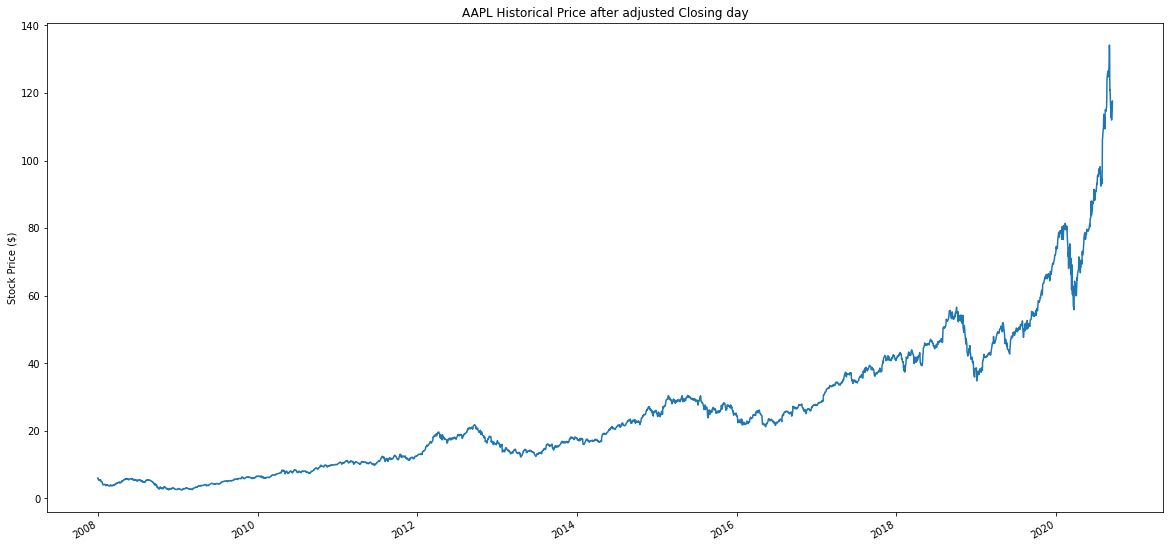

In [7]:
#showing the trend for the last 10years of apple stocks
apple_stocks08['Adj Close'].plot(figsize=(20,10)) 
plt.title('AAPL Historical Price after adjusted Closing day')
plt.xlabel('')
plt.ylabel('Stock Price ($)')

<AxesSubplot:xlabel='Date'>

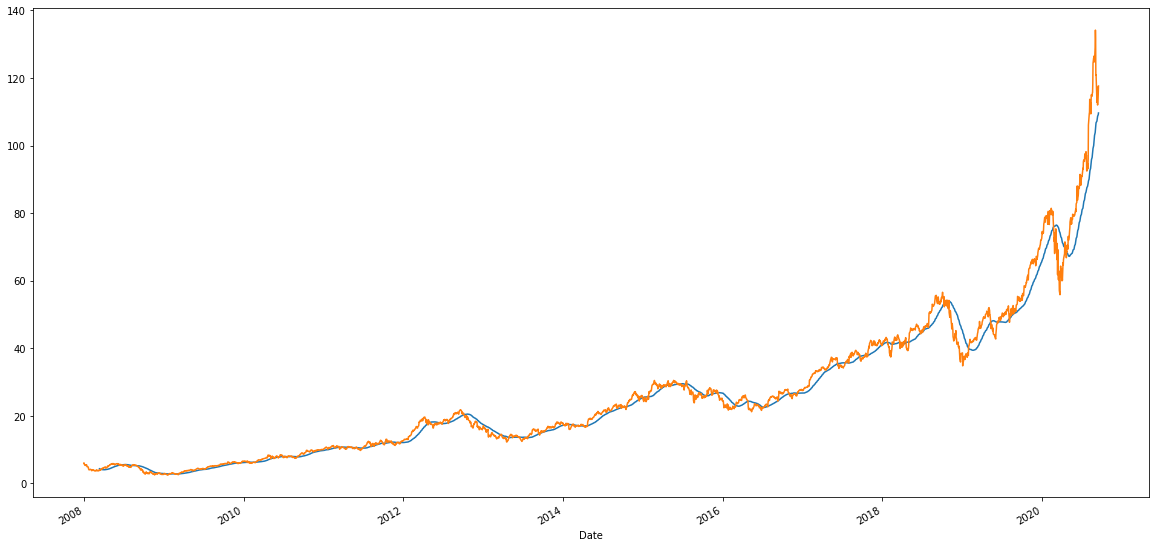

In [8]:
#Another way to take a look at the prices is to check the moving average and this way we avoid the spikes in the prices.
a = apple_stocks08['Adj Close'].rolling(50).mean()
a.plot(figsize=(20,10))
apple_stocks08['Adj Close'].plot()

Text(0.5, 1.0, 'Stocks traded volume')

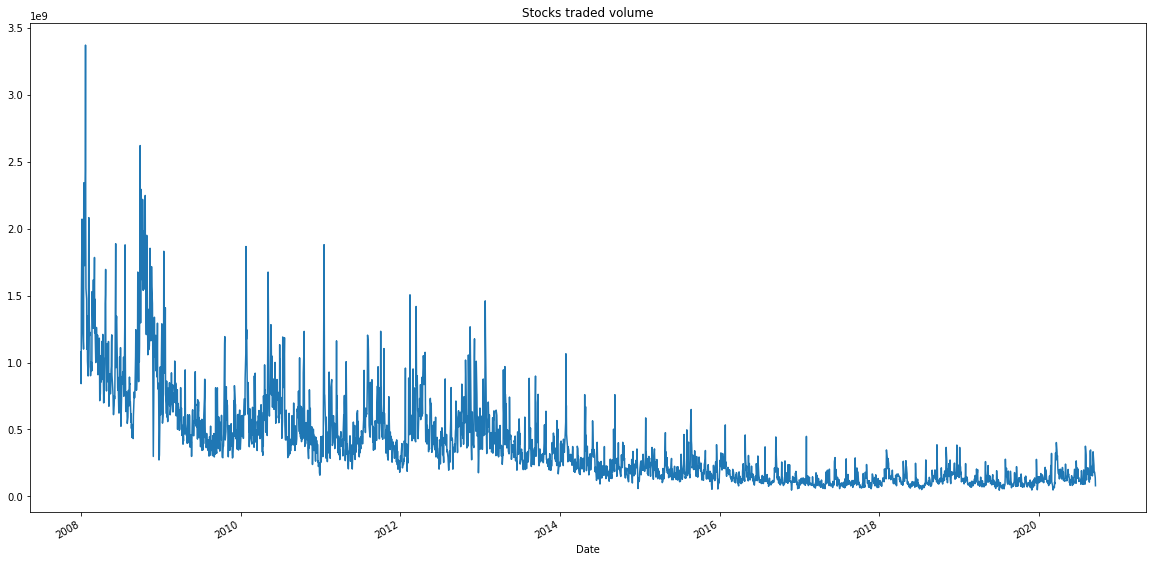

In [9]:
#Showing the amount of stocks traded(between selling and buying) since 08
apple_stocks08['Volume'].plot(figsize=(20,10))
plt.title('Stocks traded volume')

In [10]:
#Another finding that we could try to get out if this is what was the day were were traded the most stocks?
#To find out the above answer first we identify were is located the pike in the volume of shares traded using the index
apple_stocks08['Volume'].argmax()

14

In [11]:
#Using the index position we can see that in 2008 was when was traded the biggest amount of apple shares
apple_stocks08.iloc[14]

High         5.000000e+00
Low          4.505000e+00
Open         4.863929e+00
Close        4.966786e+00
Volume       3.372970e+09
Adj Close    4.291995e+00
Name: 2008-01-23 00:00:00, dtype: float64

In [12]:
#The volume of stocks is a lot, we can see that, but how much is this in dollars?
#We can get an approximated value of $ that were traded since 08 by multiplying the adjusted close price by the volume per day.
apple_stocks08['$ traded'] = apple_stocks08['Adj Close'] * apple_stocks08['Volume']
apple_stocks08

<ipython-input-12-aabcd2996ad4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_stocks08['$ traded'] = apple_stocks08['Adj Close'] * apple_stocks08['Volume']


,High,Low,Open,Close,Volume,Adj Close,$ traded
Date,,,,,,,
2008-01-02,7.152143,6.876786,7.116786,6.958571,1.079179e+09,6.013175,6.489291e+09
2008-01-03,7.049643,6.881786,6.978929,6.961786,8.420664e+08,6.015953,5.065832e+09
2008-01-04,6.892857,6.388928,6.837500,6.430357,1.455832e+09,5.556723,8.089655e+09
2008-01-07,6.557143,6.079643,6.473214,6.344285,2.072193e+09,5.482346,1.136048e+10
2008-01-08,6.516428,6.100000,6.433571,6.116071,1.523816e+09,5.285137,8.053576e+09
...,...,...,...,...,...,...,...
2020-09-09,119.139999,115.260002,117.260002,117.320000,1.769405e+08,117.320000,2.075866e+10
2020-09-10,120.500000,112.500000,120.360001,113.489998,1.822744e+08,113.489998,2.068632e+10
2020-09-11,115.230003,110.000000,114.570000,112.000000,1.808603e+08,112.000000,2.025635e+10


<AxesSubplot:xlabel='Date'>

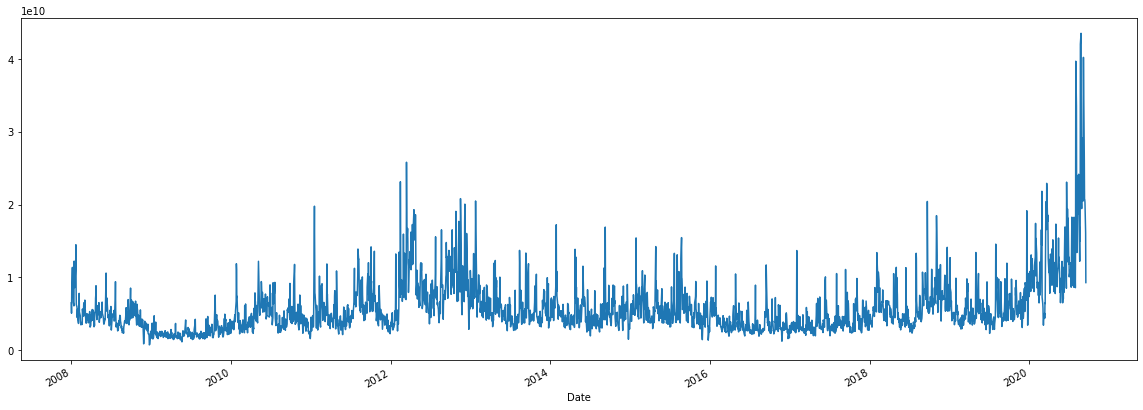

In [13]:
# here we have in a more visual way the amount of dollars being trade in AAPL stocks.
apple_stocks08['$ traded'].plot(figsize=(20,7))

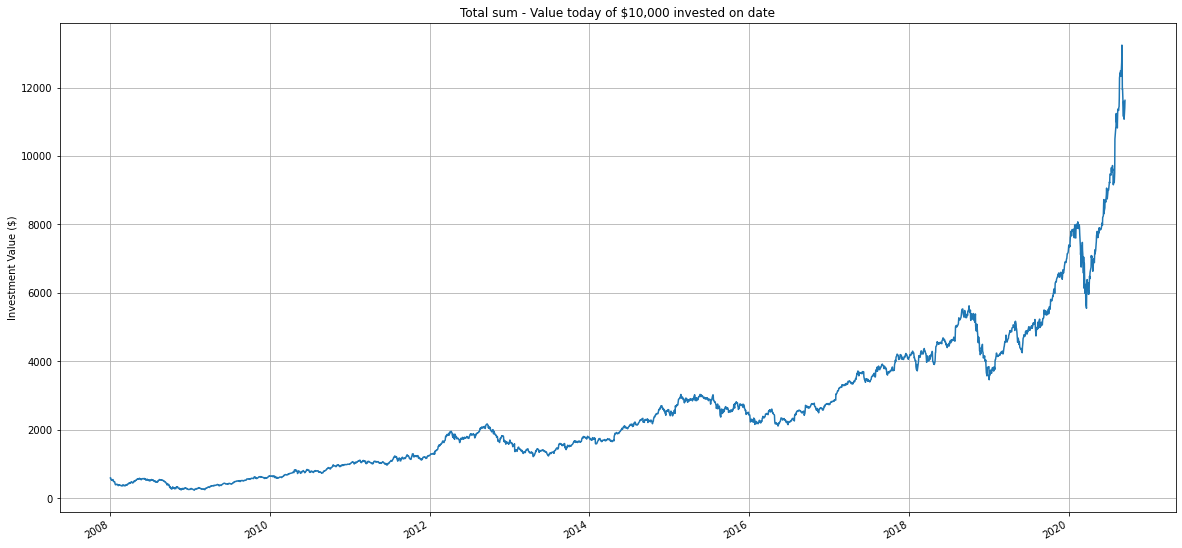

In [14]:
#what was the % of daily returns of AAPL
final_price = apple_stocks08['Adj Close']
initial_investment = 10000
ROI = (final_price - initial_investment).abs() / initial_investment * 100 # this formula is one way to calculate the Return On Investment
Totalsum = ROI * final_price
Totalsum.plot(figsize=(20,10))
plt.title('Total sum - Value today of $10,000 invested on date')
plt.xlabel('')
plt.ylabel('Investment Value ($)')
plt.grid()

In [15]:
#calculating AAPL gains or losses overtime. This shows for every dollarr invested in AAPL how much we would have for now.
apple_stocks08['returns'] = (apple_stocks08['Adj Close'] / apple_stocks08['Adj Close'].shift(1)-1)
apple_stocks08.head()

<ipython-input-15-c56a2b42b82b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_stocks08['returns'] = (apple_stocks08['Adj Close'] / apple_stocks08['Adj Close'].shift(1)-1)


,High,Low,Open,Close,Volume,Adj Close,$ traded,returns
Date,,,,,,,,
2008-01-02,7.152143,6.876786,7.116786,6.958571,1.079179e+09,6.013175,6.489291e+09,NaN
2008-01-03,7.049643,6.881786,6.978929,6.961786,8.420664e+08,6.015953,5.065832e+09,0.000462
2008-01-04,6.892857,6.388928,6.837500,6.430357,1.455832e+09,5.556723,8.089655e+09,-0.076335
2008-01-07,6.557143,6.079643,6.473214,6.344285,2.072193e+09,5.482346,1.136048e+10,-0.013385
2008-01-08,6.516428,6.100000,6.433571,6.116071,1.523816e+09,5.285137,8.053576e+09,-0.035972


<AxesSubplot:>

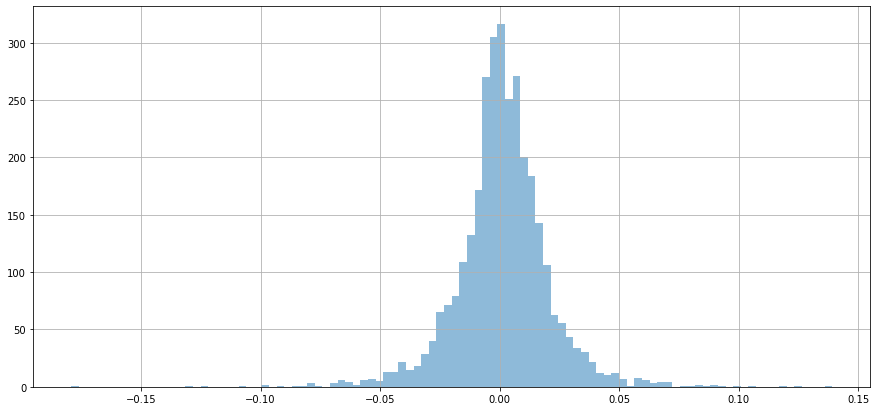

In [16]:
#Visualizating the volatility of AAPL stocks overtime by checking the daily return.
apple_stocks08['returns'].hist(bins=100, figsize=(15,7), label='AAPL', alpha=0.5)

In [17]:
#On the next analyse we want to know if we had invested 1$ in 08 how much would be woth by now.
apple_stocks08['Cumulative returns'] = (1 + apple_stocks08['returns']).cumprod()
apple_stocks08.head()

<ipython-input-17-bcb9574d4e1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_stocks08['Cumulative returns'] = (1 + apple_stocks08['returns']).cumprod()


,High,Low,Open,Close,Volume,Adj Close,$ traded,returns,Cumulative returns
Date,,,,,,,,,
2008-01-02,7.152143,6.876786,7.116786,6.958571,1.079179e+09,6.013175,6.489291e+09,NaN,NaN
2008-01-03,7.049643,6.881786,6.978929,6.961786,8.420664e+08,6.015953,5.065832e+09,0.000462,1.000462
2008-01-04,6.892857,6.388928,6.837500,6.430357,1.455832e+09,5.556723,8.089655e+09,-0.076335,0.924091
2008-01-07,6.557143,6.079643,6.473214,6.344285,2.072193e+09,5.482346,1.136048e+10,-0.013385,0.911722
2008-01-08,6.516428,6.100000,6.433571,6.116071,1.523816e+09,5.285137,8.053576e+09,-0.035972,0.878926


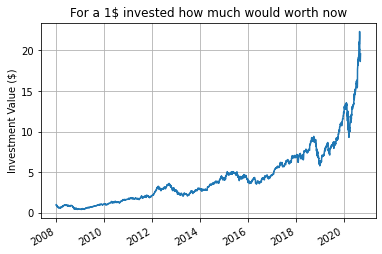

In [18]:
apple_stocks08['Cumulative returns'].plot()
plt.title('For a 1$ invested how much would worth now')
plt.xlabel('')
plt.ylabel('Investment Value ($)')
plt.grid()

In [34]:
# Calculating the volatility of the stocks over the years since 1991.
apple_stocksmask = apple_stocks.reset_index()
apple_stocksmask['year'] = pd.DatetimeIndex(apple_stocksmask['Date']).year
year_avg = apple_stocksmask.groupby('year').agg({'Adj Close': 'mean'})
year_avg.pct_change()
year_avg['%variation'] = year_avg.pct_change()
year_avg

,Adj Close,%variation
year,,
1991,0.384840,NaN
1992,0.405282,0.053118
1993,0.306171,-0.244548
1994,0.258309,-0.156325
1995,0.310926,0.203698
1996,0.192267,-0.381631
1997,0.138623,-0.279007
1998,0.235824,0.701188
1999,0.445728,0.890086


# 1.2 AAPL performance when comparing with the USA GDP

In [35]:
#Reading the USA GDP data frrom 08 till the last available year which is 2019.
gdp = pd.read_excel("GDP_data.xls", skiprows=2, header=1, index_col=0)
USA_GDP = gdp.loc['United States', '2008':]
USA_GDP = pd.DataFrame(USA_GDP)
USA_GDP.reset_index(inplace=True)
USA_GDP = USA_GDP.rename(columns={'index':'year', 'United States': '%GDP'})
USA_GDP['%GDP'] = USA_GDP['%GDP'].astype('float')
USA_GDP['year'] = USA_GDP['year'].astype('int')
USA_GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    12 non-null     int64  
 1   %GDP    12 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 320.0 bytes


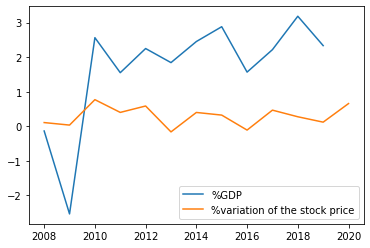

In [36]:
#Displaying the %variation of the AAPL performance when comparing with the GDP of USA
variation_avg = year_avg['%variation'].loc['2008':'2020']
variation_avg = pd.DataFrame(variation_avg)
variation_avg.reset_index(inplace=True)
x = USA_GDP['year']
y = USA_GDP['%GDP']
x1 = variation_avg['year']
y1 = variation_avg['%variation']
plt.plot(x, y, label='%GDP')
plt.plot(x1, y1, label='%variation of the stock price')
plt.legend()

# 1.3 Comparing AAPL stocks with MSFT

In [22]:
#Microsoft and apple are competitors in computing software, hardware, operating systems, mobile devices, advertising, applications, and Web browsing
#Imporrting the MSFT data since 08.
MSFT_stocks = data.DataReader(name='MSFT', data_source='yahoo', start= '2008-01-01', end='2020-12-31')
MSFT_stocks.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-01-02,35.959999,35.000000,35.790001,35.220001,63004200.0,26.385748
2008-01-03,35.650002,34.860001,35.220001,35.369999,49599600.0,26.498137
2008-01-04,35.200001,34.090000,35.189999,34.380001,72090800.0,25.756447
2008-01-07,34.799999,34.250000,34.549999,34.610001,80164300.0,25.928761
2008-01-08,34.709999,33.400002,34.709999,33.450001,79148300.0,25.059715


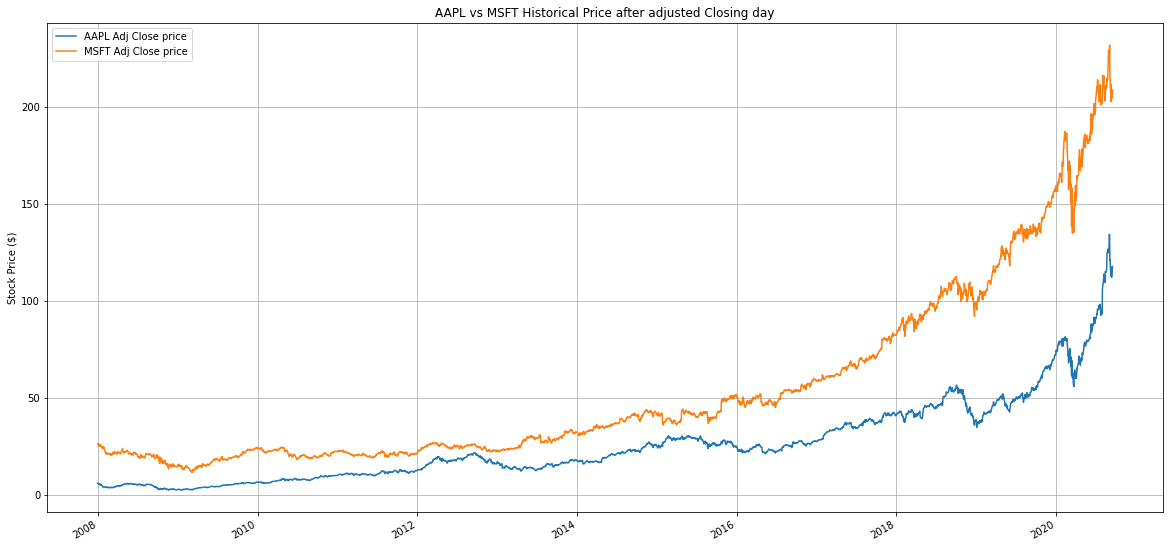

In [23]:
#Since 08 what was the evolution of MSFT when comparing with AAPL?
apple_stocks08['Adj Close'].plot(figsize=(20,10)) #showing the trend for the last 10years of apple stocks
MSFT_stocks['Adj Close'].plot()
plt.title('AAPL vs MSFT Historical Price after adjusted Closing day')
plt.xlabel('')
plt.ylabel('Stock Price ($)')
plt.legend(['AAPL Adj Close price', 'MSFT Adj Close price'])
plt.grid()

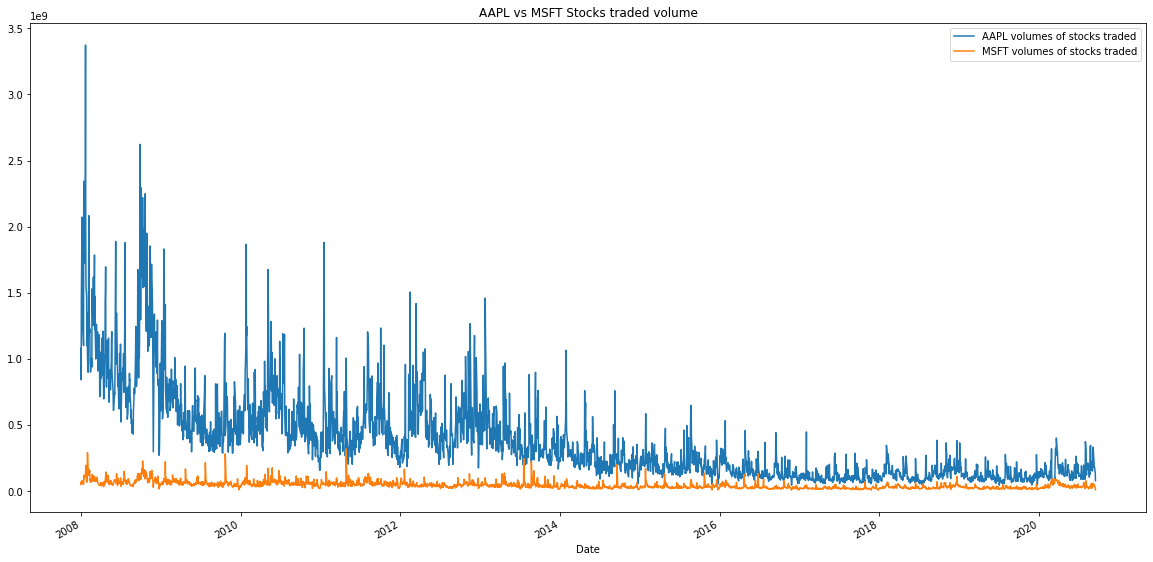

In [24]:
#Comparing now the volume of stocks traded since 08 between MSFT and AAPL
apple_stocks08['Volume'].plot(figsize=(20,10))
MSFT_stocks['Volume'].plot()
plt.title('AAPL vs MSFT Stocks traded volume')
plt.legend(['AAPL volumes of stocks traded', 'MSFT volumes of stocks traded'])

In [25]:
#How much of the volume of the stocks is translated into $ between AAPL and MSFT
#The code adds a new colum on the MSFT df with the result of the multiplication of the Adj close by the volume of stocks.
MSFT_stocks['$ traded'] = MSFT_stocks['Adj Close'] * MSFT_stocks['Volume']
MSFT_stocks

,High,Low,Open,Close,Volume,Adj Close,$ traded
Date,,,,,,,
2008-01-02,35.959999,35.000000,35.790001,35.220001,63004200.0,26.385748,1.662413e+09
2008-01-03,35.650002,34.860001,35.220001,35.369999,49599600.0,26.498137,1.314297e+09
2008-01-04,35.200001,34.090000,35.189999,34.380001,72090800.0,25.756447,1.856803e+09
2008-01-07,34.799999,34.250000,34.549999,34.610001,80164300.0,25.928761,2.078561e+09
2008-01-08,34.709999,33.400002,34.709999,33.450001,79148300.0,25.059715,1.983434e+09
...,...,...,...,...,...,...,...
2020-09-09,214.839996,206.699997,207.600006,211.289993,45679000.0,211.289993,9.651516e+09
2020-09-10,214.740005,204.110001,213.399994,205.369995,35461500.0,205.369995,7.282728e+09
2020-09-11,208.630005,201.240005,207.199997,204.029999,33620100.0,204.029999,6.859509e+09


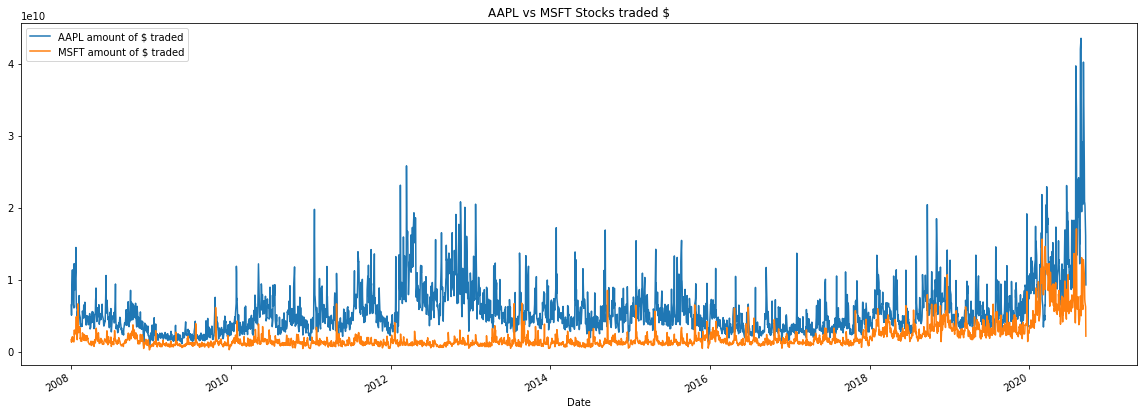

In [26]:
#Visualization comparing the amount of $ traded with AAPL stocks and MSFT stocks
apple_stocks08['$ traded'].plot(figsize=(20,7))
MSFT_stocks['$ traded'].plot()
plt.title('AAPL vs MSFT Stocks traded $')
plt.legend(['AAPL amount of $ traded', 'MSFT amount of $ traded'])

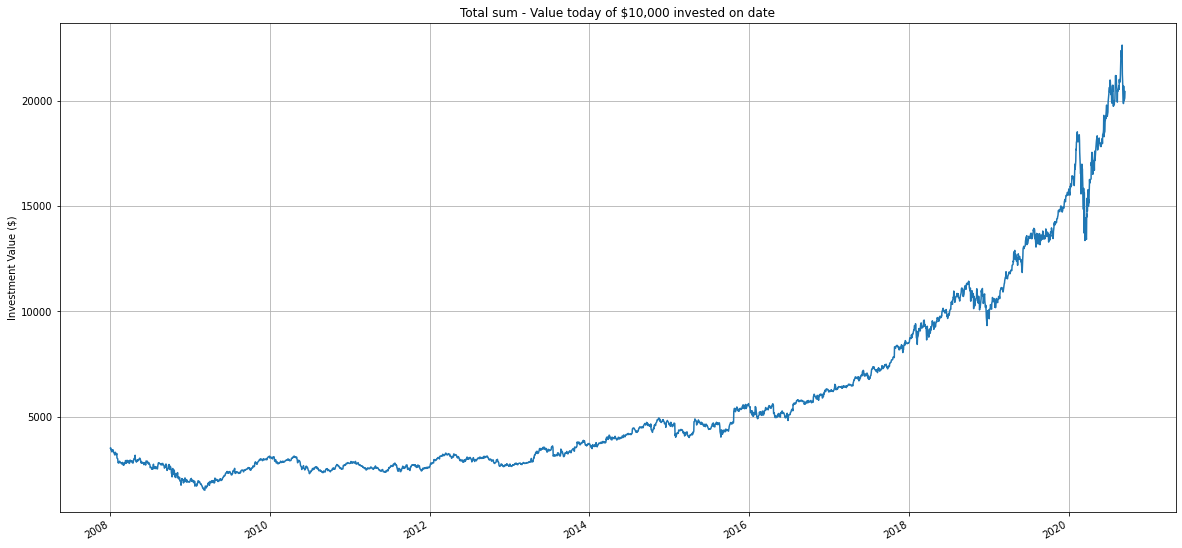

In [27]:
#Isolating the % of daily returns of MSFT if we had invested 10.000$ in 08.
end_price = MSFT_stocks['Close']
initial_investment = 10000
ROI = (end_price - initial_investment).abs() / initial_investment * 100 # this formula is one way to calculate the Return On Investment
Totalprice = ROI * end_price
Totalprice.plot(figsize=(20,10))
plt.title('Total sum - Value today of $10,000 invested on date')
plt.xlabel('')
plt.ylabel('Investment Value ($)')
plt.grid()

In [28]:
#calculating MSFT gains or losses overtime. This shows for every dollarr invested in AAPL how much we would have for now?
MSFT_stocks['returns'] = (MSFT_stocks['Adj Close'] / MSFT_stocks['Adj Close'].shift(1)-1)
MSFT_stocks.tail()

,High,Low,Open,Close,Volume,Adj Close,$ traded,returns
Date,,,,,,,,
2020-09-09,214.839996,206.699997,207.600006,211.289993,45679000.0,211.289993,9.651516e+09,0.042584
2020-09-10,214.740005,204.110001,213.399994,205.369995,35461500.0,205.369995,7.282728e+09,-0.028018
2020-09-11,208.630005,201.240005,207.199997,204.029999,33620100.0,204.029999,6.859509e+09,-0.006525
2020-09-14,209.199997,204.029999,204.240005,205.410004,30326800.0,205.410004,6.229428e+09,0.006764
2020-09-15,209.779907,206.929993,208.419998,208.570007,10310104.0,208.570007,2.150378e+09,0.015384


Text(0.5, 1.0, 'AAPL vs MSFT volatiliby')

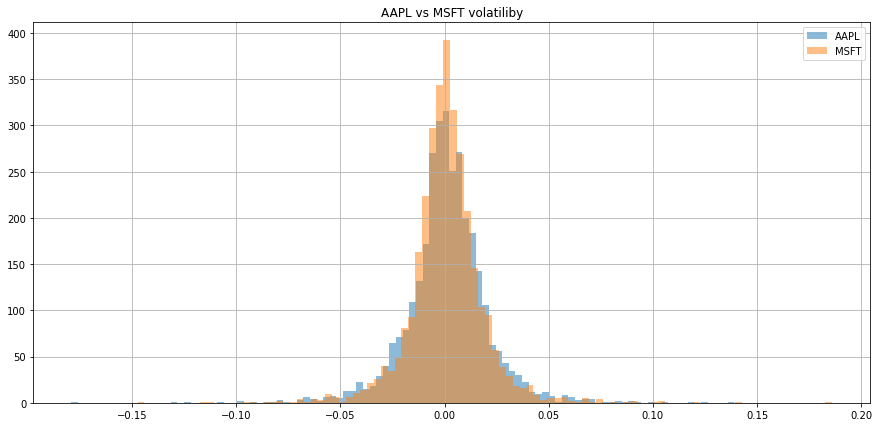

In [29]:
#Visualizating the volatility of AAPL stocks overtime when comparing with MSFT.
apple_stocks08['returns'].hist(bins=100, figsize=(15,7), label='AAPL', alpha=0.5)
MSFT_stocks['returns'].hist(bins=100, figsize=(15,7), label='MSFT', alpha=0.5)
plt.legend()
plt.title('AAPL vs MSFT volatiliby')

In [30]:
#Analyzing the cumulative returns when investing 1$ on MSFT stocks
MSFT_stocks['Cumulative returns'] = (1 + MSFT_stocks['returns']).cumprod()

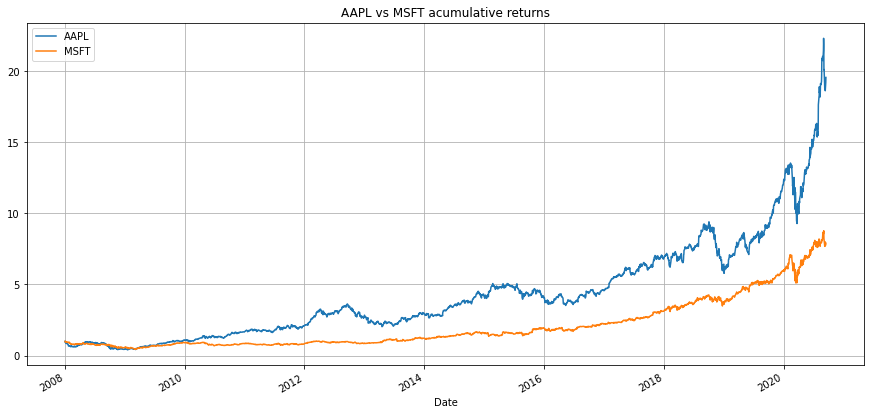

In [31]:
#Comparing cumulatives returns if invested 1$ in AAPL and MSFT stocks in 08.
apple_stocks08['Cumulative returns'].plot(figsize=(15,7), label='AAPL')
MSFT_stocks['Cumulative returns'].plot(figsize=(15,7), label='MSFT')
plt.legend()
plt.title('AAPL vs MSFT acumulative returns')
plt.grid()

# Conclusions:
According to the analyzes performed was possible to determine that the apple stocks have been consistently going up and having in mind that we are in the begging of a economical crisis from the historical data collected it was possible to see that the prices started to going up and the volume of stocks traded was the highest ever.

When comparing with one of the biggest competitor, Microsfot(american competitor) we could conclude that AAPL stocks are more volatile, meaning, that have more ups and downs. AAPL investors are more active buying and selling stocks and generating more $ on those trades.

One of the more interesting findings and a good motivation for deciding if investing in AAPL is or is not a good option is the returns after investing 1 dollar in 08. By investing 1$ in AAPL stocks in 2008 this dollar would worth now 20dollars and 8dollars if invested in MSFT stocks instead. Altought past gains are not guarantee of future gains is without doubt a good indicator.